In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

Data generation complete. Shape: (60, 50)


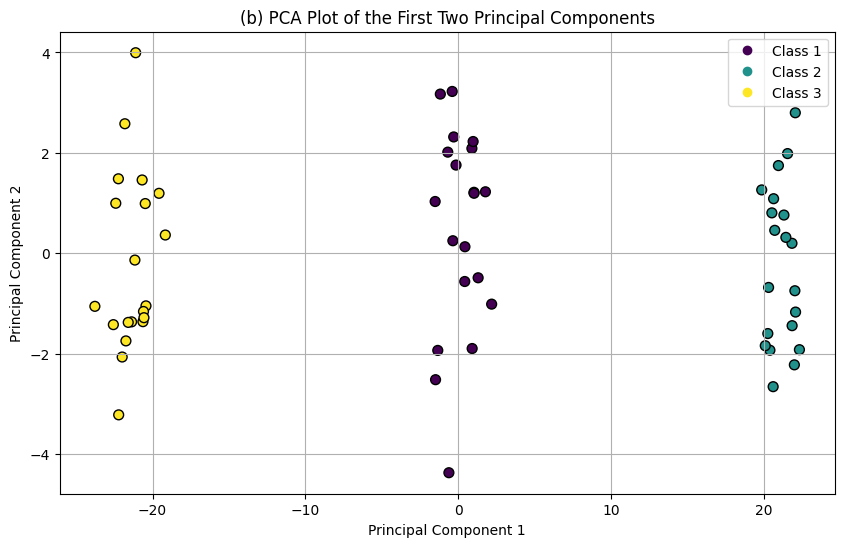


(c) K-means (K=3) Results - Comparison with True Labels:
Cluster Label   0   1   2
True Class               
0.0             0   0  20
1.0            20   0   0
2.0             0  20   0

(d) K-means (K=2) Results:
Cluster Label   0   1
True Class           
0.0            20   0
1.0            20   0
2.0             0  20

(e) K-means (K=4) Results:
Cluster Label   0   1  2   3
True Class                  
0.0             0   0  9  11
1.0             0  20  0   0
2.0            20   0  0   0

(f) K-means (K=3) on PCA Data (2D) Results:
Cluster Label   0   1   2
True Class               
0.0             0   0  20
1.0            20   0   0
2.0             0  20   0

(g) K-means (K=3) on Standardized Data Results:
Cluster Label   0   1   2
True Class               
0.0             0   0  20
1.0            20   0   0
2.0             0  20   0


In [4]:
# (a) Generate Synthetic Data
# ==========================================
# Total number of observations and variables
n_samples = 60
n_features = 50

# Generate normally distributed data with mean 0 and std 1
X = np.random.normal(0, 1, (n_samples, n_features))

# Create true class labels: 20 for each of the 3 classes
y_true = np.concatenate([np.zeros(20), np.ones(20), np.ones(20)*2])

# Add mean shifts to ensure the classes are separable in the high-dimensional space
# Class 1 (Index 0-19): Mean remains 0
# Class 2 (Index 20-39): Shifted by +3 across all features
X[20:40, :] += 3
# Class 3 (Index 40-59): Shifted by -3 across all features
X[40:60, :] -= 3

print("Data generation complete. Shape:", X.shape)

# ==========================================
# (b) Perform PCA and Plot the First Two Principal Components
# ==========================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
# Plot the data, colored by their true classes
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', edgecolor='k', s=50)
plt.title('(b) PCA Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2', 'Class 3'])
plt.grid(True)
plt.show()

# ==========================================
# (c) K-means Clustering with K=3 (Optimal K)
# ==========================================
# Run K-means with the true number of clusters (K=3)
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans_k3.fit(X)
labels_k3 = kmeans_k3.labels_

print("\n(c) K-means (K=3) Results - Comparison with True Labels:")
# Use crosstab to compare true labels vs. cluster labels
print(pd.crosstab(index=y_true, columns=labels_k3, rownames=['True Class'], colnames=['Cluster Label']))


# ==========================================
# (d) K-means Clustering with K=2 (Underestimation)
# ==========================================
# Run K-means with K=2, forcing the algorithm to merge two classes
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=20)
kmeans_k2.fit(X)
labels_k2 = kmeans_k2.labels_

print("\n(d) K-means (K=2) Results:")
print(pd.crosstab(index=y_true, columns=labels_k2, rownames=['True Class'], colnames=['Cluster Label']))


# ==========================================
# (e) K-means Clustering with K=4 (Overestimation)
# ==========================================
# Run K-means with K=4, forcing the algorithm to split one class
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=20)
kmeans_k4.fit(X)
labels_k4 = kmeans_k4.labels_

print("\n(e) K-means (K=4) Results:")
print(pd.crosstab(index=y_true, columns=labels_k4, rownames=['True Class'], colnames=['Cluster Label']))


# ==========================================
# (f) K-means Clustering (K=3) on PCA Transformed Data (2 Components)
# ==========================================
# Use the previously computed X_pca (data projected onto 2 dimensions)
kmeans_pca_k3 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans_pca_k3.fit(X_pca)
labels_pca_k3 = kmeans_pca_k3.labels_

print("\n(f) K-means (K=3) on PCA Data (2D) Results:")
print(pd.crosstab(index=y_true, columns=labels_pca_k3, rownames=['True Class'], colnames=['Cluster Label']))


# ==========================================
# (g) K-means Clustering (K=3) on Standardized Data
# ==========================================
# Scale the data so all features have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans_scaled.fit(X_scaled)
labels_scaled = kmeans_scaled.labels_

print("\n(g) K-means (K=3) on Standardized Data Results:")
print(pd.crosstab(index=y_true, columns=labels_scaled, rownames=['True Class'], colnames=['Cluster Label']))

The simulation results demonstrate that K-means performs optimally when K matches the true number of classes (K=3). Choosing a smaller K merges distinct classes, while a larger K artificially splits a single class. Furthermore, PCA dimensionality reduction and data scaling proved to be robust preprocessing steps, maintaining the perfect separability of the clusters.